<a href="https://colab.research.google.com/github/devovevo/cs4220/blob/main/CS_4220_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.genfromtxt("GN.txt", delimiter=",")
print(data.shape)
print(data)

FileNotFoundError: GN.txt not found.

In [4]:
plt.plot(data[:, 0], data[:, 1])

NameError: name 'data' is not defined

In [ ]:
def model(x, theta):
  return theta[0] * np.exp(theta[1] * x) * np.cos(2 * np.pi * x) + np.exp(theta[2] * x) * np.cos(10 * np.pi * x)

In [ ]:
def model_grad(x, theta):
  return np.array([
      np.exp(theta[1] * x) * np.cos(2 * np.pi * x),
      theta[0] * x * np.exp(theta[1] * x) * np.cos(2 * np.pi * x),
      x * np.exp(theta[2] * x) * np.cos(10 * np.pi * x)
    ]).T

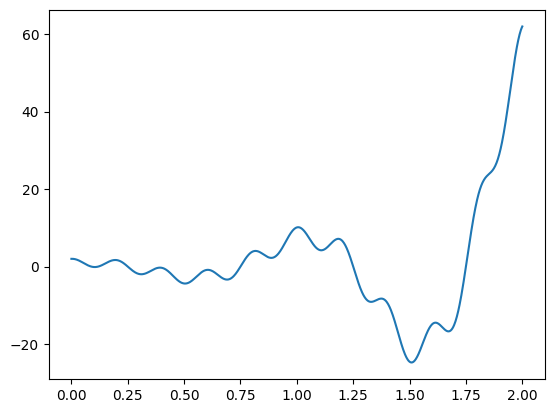

In [ ]:
init_guess = model(data[:, 0], np.array([1, 2, 1]))
plt.plot(data[:, 0], init_guess)

In [ ]:
init_grad = model_grad(data[:, 0], np.array([0, 5, 1]))
print(init_grad.shape)
print(init_grad)

(1000, 3)
[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00998037e+00 0.00000000e+00 2.00204769e-03]
 [1.01989892e+00 0.00000000e+00 3.98830534e-03]
 ...
 [2.15830483e+04 0.00000000e+00 1.45735278e+01]
 [2.18053553e+04 0.00000000e+00 1.47046607e+01]
 [2.20264658e+04 0.00000000e+00 1.47781122e+01]]


In [1]:
def gauss_newton(theta0, data, labels, max_iter=500000000, tol=1e-10, return_all=False):
  if return_all:
    theta_list = [theta0]
    p_list = []

  theta = theta0

  for k in range(max_iter):
    cur_preds = model(data, theta)
    cur_grad = model_grad(data, theta)

    lstsq_result = np.linalg.lstsq(cur_grad, labels - cur_preds, rcond=None)
    p = lstsq_result[0].reshape(3, 1)

    if np.linalg.norm(p) < tol:
      break

    theta = theta + lstsq_result[0].reshape(3, 1)

    if return_all:
      theta_list.append(theta)
      p_list.append(p)

  return theta

In [ ]:
theta0 = np.random.uniform(low=0.5,high=1.5,size=(3,1))
print(theta0)

results = gauss_newton(theta0, data[:, 0], data[:, 1])

grad = model_grad(data[:, 0], results) / len(data)
print(np.linalg.norm(grad))
print(grad)

preds = model(data[:, 0], results)
plt.plot(data[:, 0], data[:, 1])
plt.plot(data[:, 0], preds)

[[1.34213562]
 [1.48308467]
 [0.74939433]]
1.002328524060318
0.9979654419650459
0.9979654419650459


KeyboardInterrupt: 